**Group - 5**
1. Rahul Kothuri
2. Kratin Verma
3. Dhiraj Laulkar
4. Akshar rao


Importing data from google sheets and Installing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import gspread
from gspread_dataframe import get_as_dataframe

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.auth.transport.requests import Request
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

sheet_url = "https://docs.google.com/spreadsheets/d/1tJ_q4Yr6kHA7eC5K6I5DsXXElAgXaQhDxBopUWUUtGs/edit?usp=sharing"
spreadsheet = gc.open_by_url(sheet_url)

worksheet = spreadsheet.get_worksheet(0)
data = get_as_dataframe(worksheet)



In [ ]:
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33.0,1.0,2.0,4.0,5.0,4.0,3.0,2.0,2.0,...,3.0,4.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0,Low
1,P10,17.0,1.0,3.0,1.0,5.0,3.0,4.0,2.0,2.0,...,1.0,3.0,7.0,8.0,6.0,2.0,1.0,7.0,2.0,Medium
2,P100,35.0,1.0,4.0,5.0,6.0,5.0,5.0,4.0,6.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7.0,2.0,High
3,P1000,37.0,1.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,...,4.0,2.0,3.0,1.0,4.0,5.0,6.0,7.0,5.0,High
4,P101,46.0,1.0,6.0,8.0,7.0,7.0,7.0,6.0,7.0,...,3.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,High


In [ ]:
data.dropna()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33.0,1.0,2.0,4.0,5.0,4.0,3.0,2.0,2.0,...,3.0,4.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0,Low
1,P10,17.0,1.0,3.0,1.0,5.0,3.0,4.0,2.0,2.0,...,1.0,3.0,7.0,8.0,6.0,2.0,1.0,7.0,2.0,Medium
2,P100,35.0,1.0,4.0,5.0,6.0,5.0,5.0,4.0,6.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7.0,2.0,High
3,P1000,37.0,1.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,...,4.0,2.0,3.0,1.0,4.0,5.0,6.0,7.0,5.0,High
4,P101,46.0,1.0,6.0,8.0,7.0,7.0,7.0,6.0,7.0,...,3.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44.0,1.0,6.0,7.0,7.0,7.0,7.0,6.0,7.0,...,5.0,3.0,2.0,7.0,8.0,2.0,4.0,5.0,3.0,High
996,P996,37.0,2.0,6.0,8.0,7.0,7.0,7.0,6.0,7.0,...,9.0,6.0,5.0,7.0,2.0,4.0,3.0,1.0,4.0,High
997,P997,25.0,2.0,4.0,5.0,6.0,5.0,5.0,4.0,6.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7.0,2.0,High
998,P998,18.0,2.0,6.0,8.0,7.0,7.0,7.0,6.0,7.0,...,3.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,High


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       1000 non-null   float64
 2   Gender                    1000 non-null   float64
 3   Air Pollution             1000 non-null   float64
 4   Alcohol use               1000 non-null   float64
 5   Dust Allergy              1000 non-null   float64
 6   OccuPational Hazards      1000 non-null   float64
 7   Genetic Risk              1000 non-null   float64
 8   chronic Lung Disease      1000 non-null   float64
 9   Balanced Diet             1000 non-null   float64
 10  Obesity                   1000 non-null   float64
 11  Smoking                   1000 non-null   float64
 12  Passive Smoker            1000 non-null   float64
 13  Chest Pain                1000 non-null   float64
 14  Coughing of Bl

In [ ]:

data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
data.drop(['Patient Id'], axis=1, inplace=True)

In [ ]:
data['Gender'] = data['Gender'].map({1: 'Male', 2: 'Female'})

<ipython-input-9-1c45f79c57ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Level', data=data, palette='viridis')


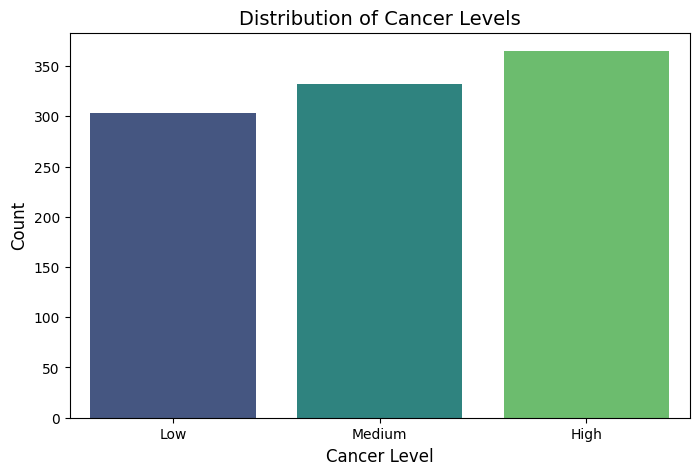

In [ ]:
# Distribution of cancer levels
plt.figure(figsize=(8, 5))
sns.countplot(x='Level', data=data, palette='viridis')
plt.title('Distribution of Cancer Levels', fontsize=14)
plt.xlabel('Cancer Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<ipython-input-10-0aaa9acce3fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


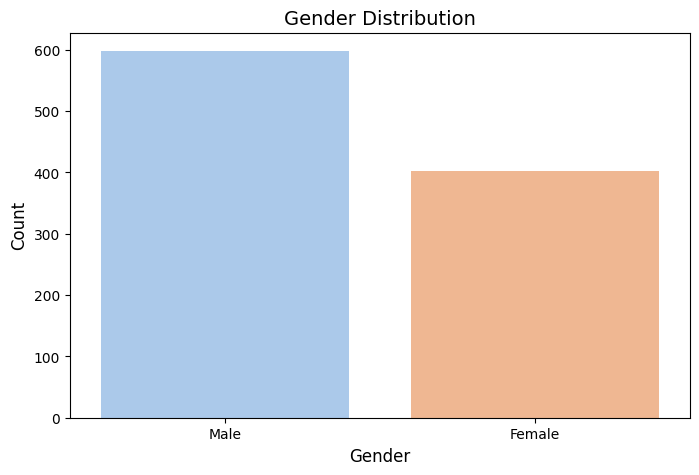

In [ ]:
# Gender distribution among patients
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


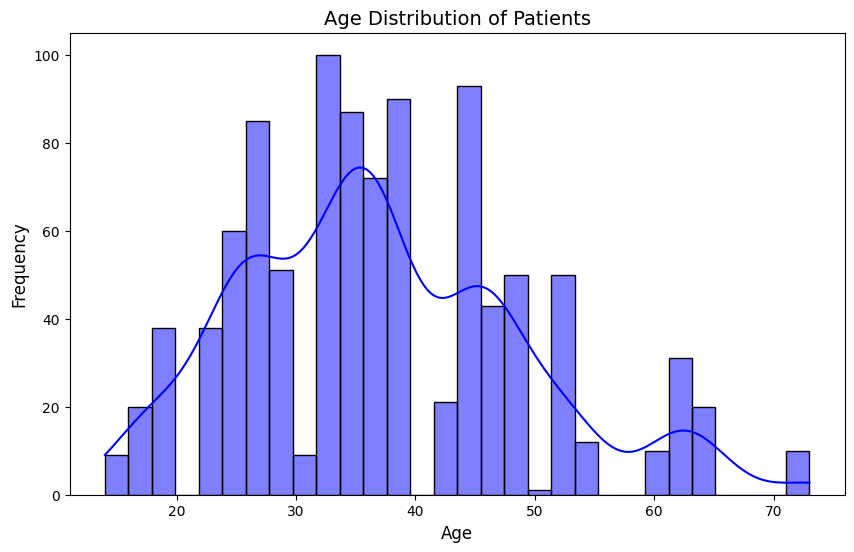

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-12-084bec8a1693>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y='Age', data=data, palette='coolwarm')


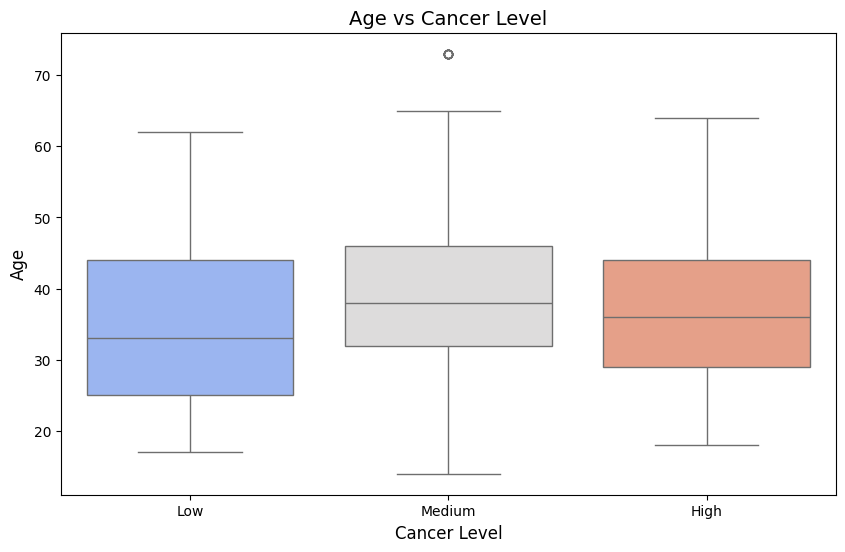

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Age', data=data, palette='coolwarm')
plt.title('Age vs Cancer Level', fontsize=14)
plt.xlabel('Cancer Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

<ipython-input-13-23691b349ae6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y='Smoking', data=data, palette='mako')


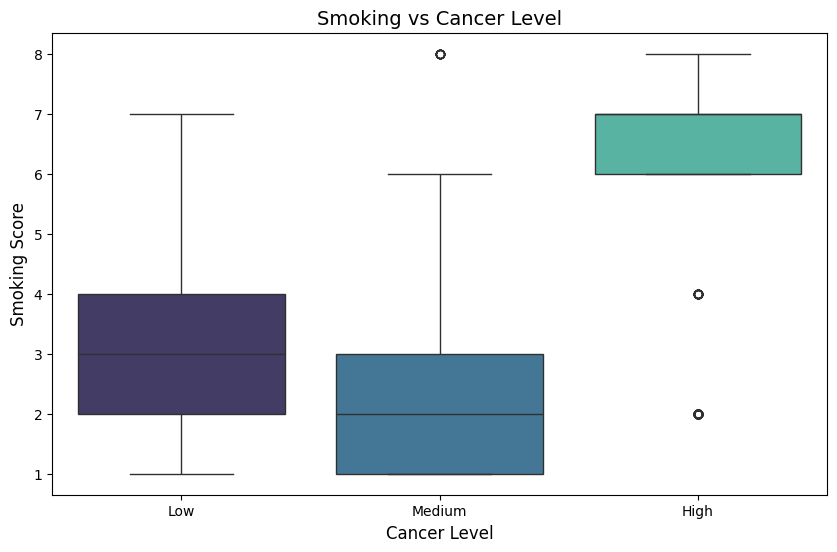

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Smoking', data=data, palette='mako')
plt.title('Smoking vs Cancer Level', fontsize=14)
plt.xlabel('Cancer Level', fontsize=12)
plt.ylabel('Smoking Score', fontsize=12)
plt.show()

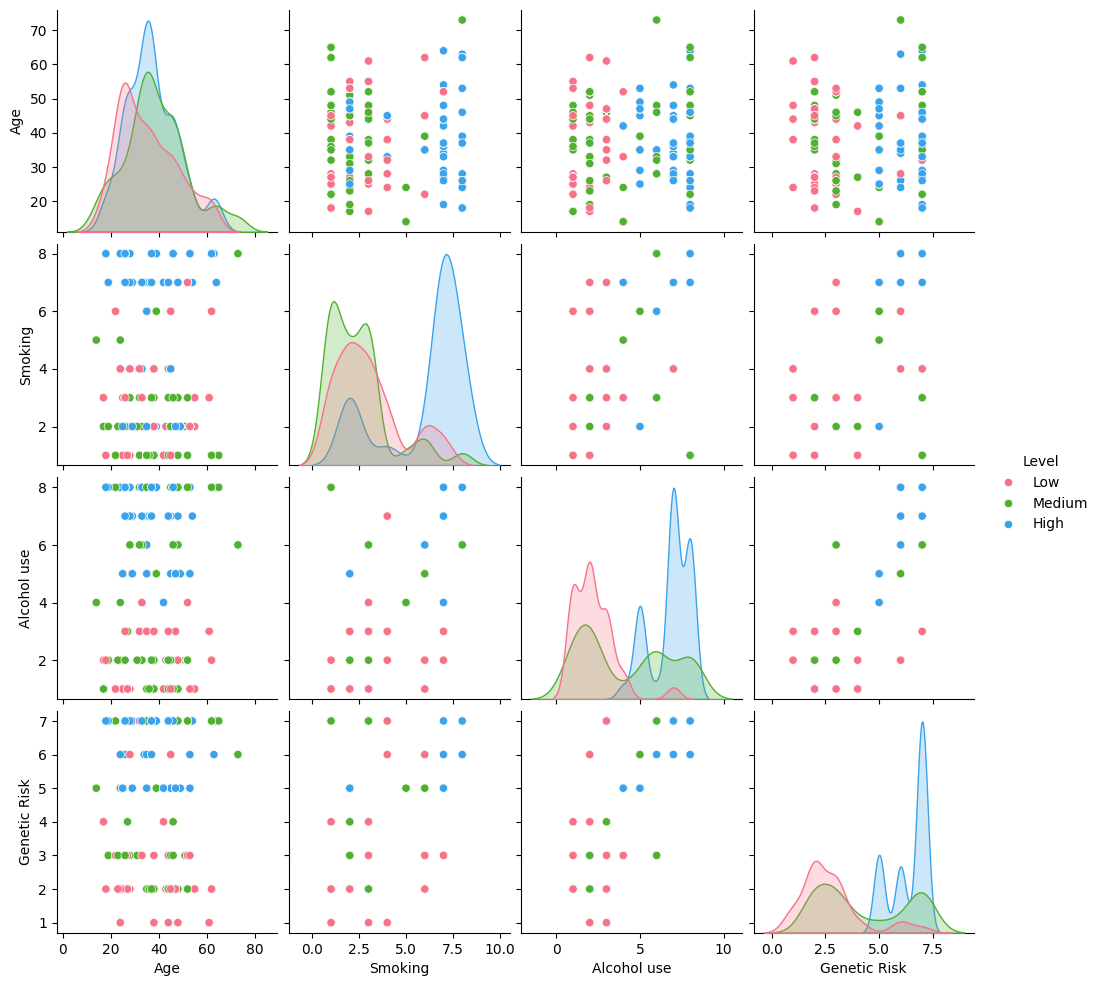

In [ ]:
selected_features = ['Age', 'Smoking', 'Alcohol use', 'Genetic Risk', 'Level']
sns.pairplot(data[selected_features], hue='Level', palette='husl', diag_kind='kde')
plt.show()

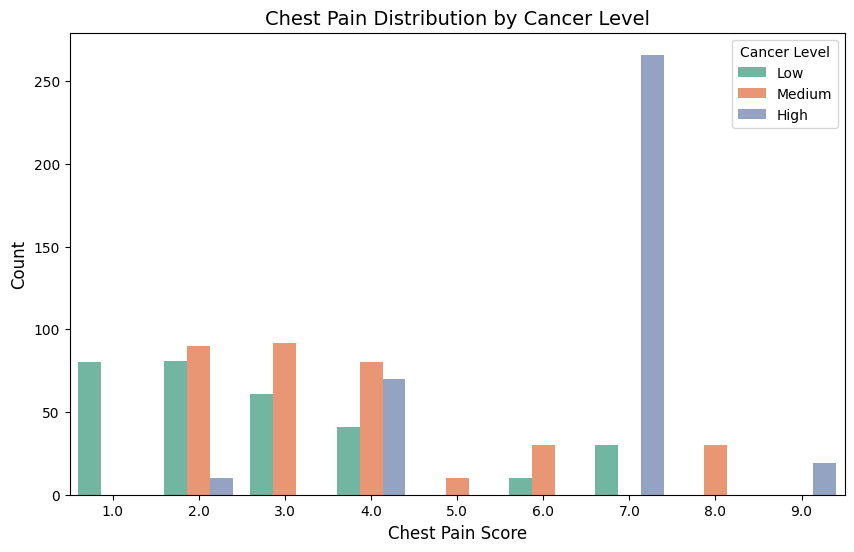

In [ ]:
# Count of chest pain cases by Cancer Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest Pain', hue='Level', data=data, palette='Set2')
plt.title('Chest Pain Distribution by Cancer Level', fontsize=14)
plt.xlabel('Chest Pain Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cancer Level')
plt.show()

In [ ]:
le = LabelEncoder()
data['Level'] = le.fit_transform(data['Level'])
data['Gender'] = le.fit_transform(data['Gender'])

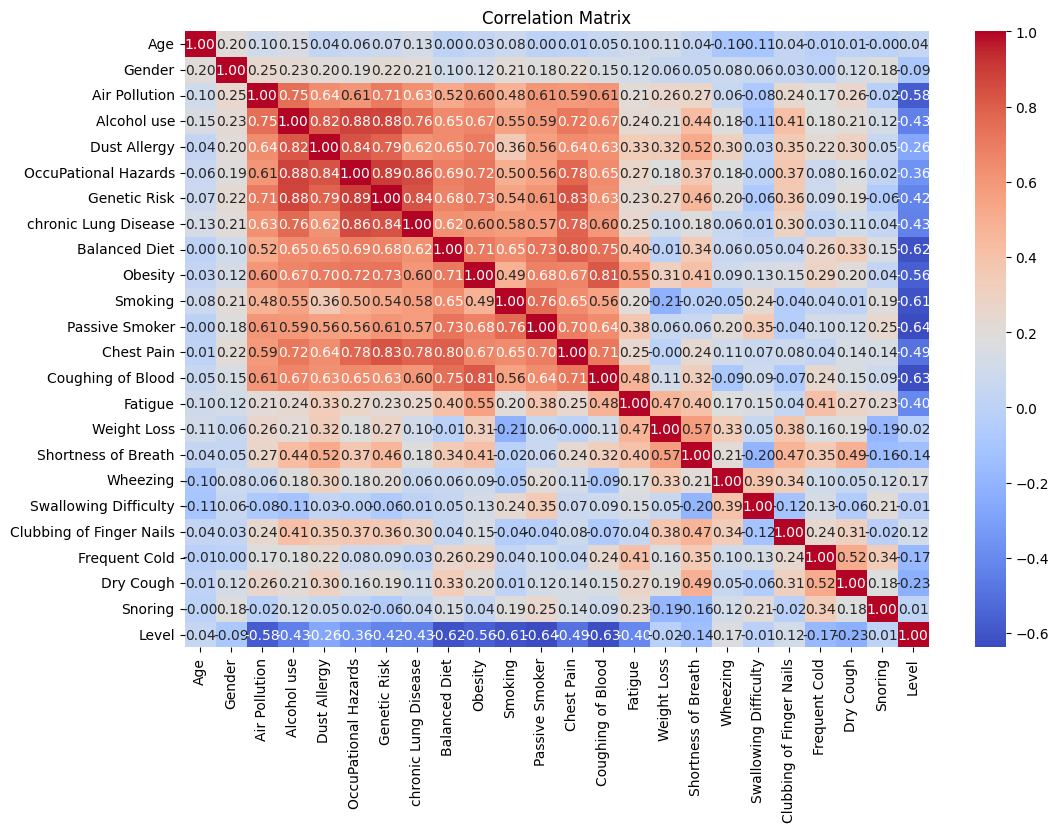

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = data.drop('Level', axis=1)
y = data['Level']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

KNN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



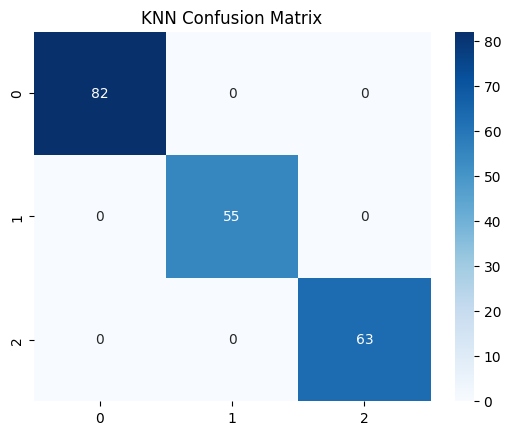

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



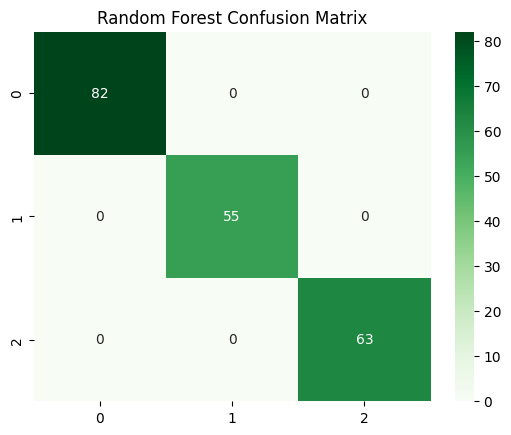

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_scaled, y, cv=5)
print("Cross-Validation Accuracy Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


# **Conclusion**

While both models achieved perfect performance metrics, this likely indicates severe overfitting rather than superior classification ability. The identical perfect scores across two different algorithms strongly suggest that the models have memorized the training data instead of learning generalizable patterns.

This case serves as an important reminder that perfect performance metrics often indicate potential problems rather than optimal model behavior, particularly in medical applications where data typically contains natural variance and noise. The priority should be developing models that generalize well rather than achieving perfect scores on the training data.